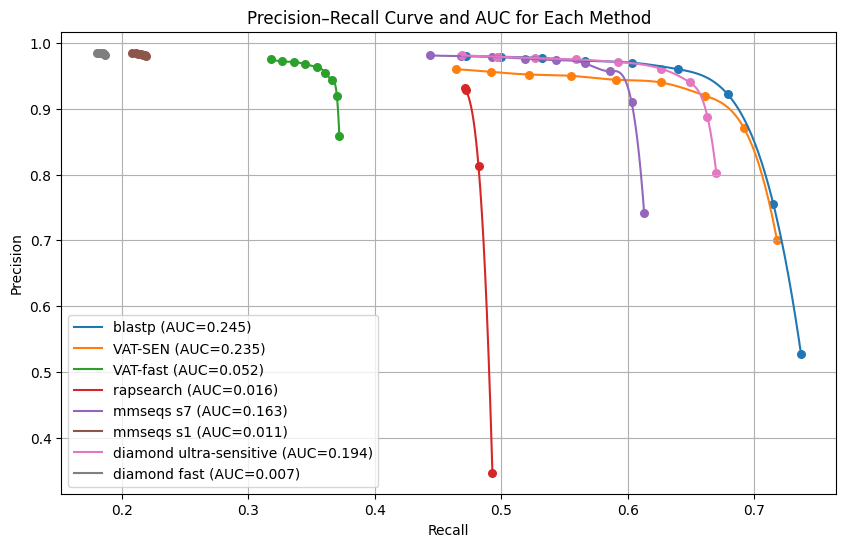

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Data for each method stored in a dictionary
data = {
    "blastp": {
        "Precision": np.array([0.527, 0.756, 0.922, 0.96, 0.97, 0.973, 0.977, 0.979, 0.98]),
        "Recall":    np.array([0.737, 0.715, 0.679, 0.64, 0.603, 0.566, 0.532, 0.5, 0.472]),
    },
    "VAT-SEN": {
        "Precision": np.array([0.7, 0.87, 0.92, 0.94, 0.944, 0.95, 0.952, 0.956, 0.96]),
        "Recall":    np.array([0.718, 0.692, 0.661, 0.626, 0.591, 0.555, 0.522, 0.492, 0.464]),
    },
    "VAT-fast": {
        "Precision": np.array([0.858, 0.92, 0.944, 0.955, 0.963, 0.968, 0.971, 0.972, 0.975]),
        "Recall":    np.array([0.372, 0.37, 0.366, 0.361, 0.354, 0.345, 0.336, 0.327, 0.318]),
    },
    "rapsearch": {
        "Precision": np.array([0.347, 0.813, 0.928, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931]),
        "Recall":    np.array([0.493, 0.482, 0.472, 0.471, 0.471, 0.471, 0.471, 0.471, 0.471]),
    },
    "mmseqs s7": {
        "Precision": np.array([0.741, 0.91, 0.957, 0.969, 0.974, 0.976, 0.979, 0.98, 0.981]),
        "Recall":    np.array([0.613, 0.603, 0.586, 0.566, 0.543, 0.519, 0.493, 0.468, 0.444]),
    },
    "mmseqs s1": {
        "Precision": np.array([0.976, 0.98, 0.981, 0.981, 0.982, 0.983, 0.983, 0.984, 0.984]),
        "Recall":    np.array([0.219, 0.219, 0.218, 0.218, 0.217, 0.215, 0.213, 0.211, 0.208]),
    },
    "diamond ultra-sensitive": {
        "Precision": np.array([0.802, 0.888, 0.94, 0.961, 0.971, 0.975, 0.977, 0.979, 0.981]),
        "Recall":    np.array([0.67, 0.663, 0.649, 0.626, 0.592, 0.559, 0.527, 0.497, 0.469]),
    },
    "diamond fast": {
        "Precision": np.array([0.98, 0.982, 0.983, 0.983, 0.984, 0.984, 0.984, 0.985, 0.985]),
        "Recall":    np.array([0.187, 0.187, 0.186, 0.186, 0.185, 0.184, 0.183, 0.181, 0.18]),
    }
}

plt.figure(figsize=(10, 6))

# For each method, reverse the order so that Recall increases.
for method, metrics in data.items():
    precision = metrics["Precision"]
    recall = metrics["Recall"]
    
    # Reverse arrays so that recall is in increasing order
    recall_sorted = recall[::-1]
    precision_sorted = precision[::-1]
    
    # Remove duplicate recall values and keep corresponding precision values.
    unique_recall, unique_indices = np.unique(recall_sorted, return_index=True)
    unique_precision = precision_sorted[unique_indices]
    
    # Compute AUC using the trapezoidal rule on unique points.
    auc = np.trapz(unique_precision, unique_recall)
    
    # Perform spline interpolation only if we have enough unique points.
    if len(unique_recall) >= 4:
        spline = make_interp_spline(unique_recall, unique_precision, k=3)
        recall_smooth = np.linspace(unique_recall.min(), unique_recall.max(), 300)
        precision_smooth = spline(recall_smooth)
    else:
        recall_smooth = unique_recall
        precision_smooth = unique_precision
    
    plt.plot(recall_smooth, precision_smooth, label=f"{method} (AUC={auc:.3f})")
    plt.scatter(unique_recall, unique_precision, s=30)
# plt.plot(recall_smooth, precision_smooth, label=f"{method} (AUC={auc:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve and AUC for Each Method")
plt.legend()
plt.grid(True)
plt.show()


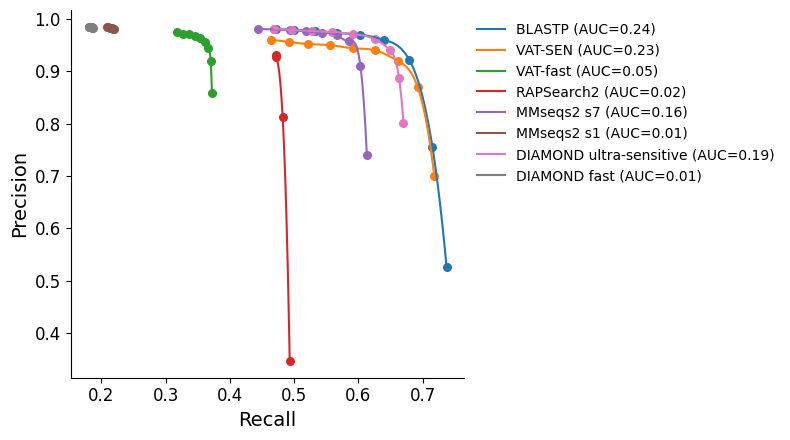

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Data for each method stored in a dictionary
data = {
    "BLASTP": {
        "Precision": np.array([0.527, 0.756, 0.922, 0.96, 0.97, 0.973, 0.977, 0.979, 0.98]),
        "Recall":    np.array([0.737, 0.715, 0.679, 0.64, 0.603, 0.566, 0.532, 0.5, 0.472]),
    },
    "VAT-SEN": {
        "Precision": np.array([0.7, 0.87, 0.92, 0.94, 0.944, 0.95, 0.952, 0.956, 0.96]),
        "Recall":    np.array([0.718, 0.692, 0.661, 0.626, 0.591, 0.555, 0.522, 0.492, 0.464]),
    },
    "VAT-fast": {
        "Precision": np.array([0.858, 0.92, 0.944, 0.955, 0.963, 0.968, 0.971, 0.972, 0.975]),
        "Recall":    np.array([0.372, 0.37, 0.366, 0.361, 0.354, 0.345, 0.336, 0.327, 0.318]),
    },
    "RAPSearch2": {
        "Precision": np.array([0.347, 0.813, 0.928, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931]),
        "Recall":    np.array([0.493, 0.482, 0.472, 0.471, 0.471, 0.471, 0.471, 0.471, 0.471]),
    },
    "MMseqs2 s7": {
        "Precision": np.array([0.741, 0.91, 0.957, 0.969, 0.974, 0.976, 0.979, 0.98, 0.981]),
        "Recall":    np.array([0.613, 0.603, 0.586, 0.566, 0.543, 0.519, 0.493, 0.468, 0.444]),
    },
    "MMseqs2 s1": {
        "Precision": np.array([0.976, 0.98, 0.981, 0.981, 0.982, 0.983, 0.983, 0.984, 0.984]),
        "Recall":    np.array([0.219, 0.219, 0.218, 0.218, 0.217, 0.215, 0.213, 0.211, 0.208]),
    },
    "DIAMOND ultra-sensitive": {
        "Precision": np.array([0.802, 0.888, 0.94, 0.961, 0.971, 0.975, 0.977, 0.979, 0.981]),
        "Recall":    np.array([0.67, 0.663, 0.649, 0.626, 0.592, 0.559, 0.527, 0.497, 0.469]),
    },
    "DIAMOND fast": {
        "Precision": np.array([0.98, 0.982, 0.983, 0.983, 0.984, 0.984, 0.984, 0.985, 0.985]),
        "Recall":    np.array([0.187, 0.187, 0.186, 0.186, 0.185, 0.184, 0.183, 0.181, 0.18]),
    }
}

plt.figure(figsize=(8, 4.5))

# For each method, reverse the order so that Recall increases.
for method, metrics in data.items():
    precision = metrics["Precision"]
    recall = metrics["Recall"]
    
    # Reverse arrays so that Recall is in increasing order
    recall_sorted = recall[::-1]
    precision_sorted = precision[::-1]
    
    # Remove duplicate Recall values and keep corresponding Precision values.
    unique_recall, unique_indices = np.unique(recall_sorted, return_index=True)
    unique_precision = precision_sorted[unique_indices]
    
    # Compute AUC using the trapezoidal rule on unique points.
    auc = np.trapz(unique_precision, unique_recall)
    
    # Perform spline interpolation only if we have enough unique points.
    if len(unique_recall) >= 4:
        spline = make_interp_spline(unique_recall, unique_precision, k=3)
        recall_smooth = np.linspace(unique_recall.min(), unique_recall.max(), 300)
        precision_smooth = spline(recall_smooth)
    else:
        recall_smooth = unique_recall
        precision_smooth = unique_precision
    
    plt.plot(recall_smooth, precision_smooth, label=f"{method} (AUC={auc:.2f})")
    plt.scatter(unique_recall, unique_precision, s=30)
    # plt.spines["top"].set_visible(False)
    # plt.spines["right"].set_visible(False)

plt.xlabel("Recall",fontsize=14)
plt.ylabel("Precision",fontsize=14)

# Increase tick label font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.title("Precision–Recall Curve and AUC for Each Method")
# Remove the right and top borders
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# Place legend outside the plot area on the right
plt.legend(loc="upper left", bbox_to_anchor=(1, 1),frameon=False)
plt.tight_layout()

plt.show()


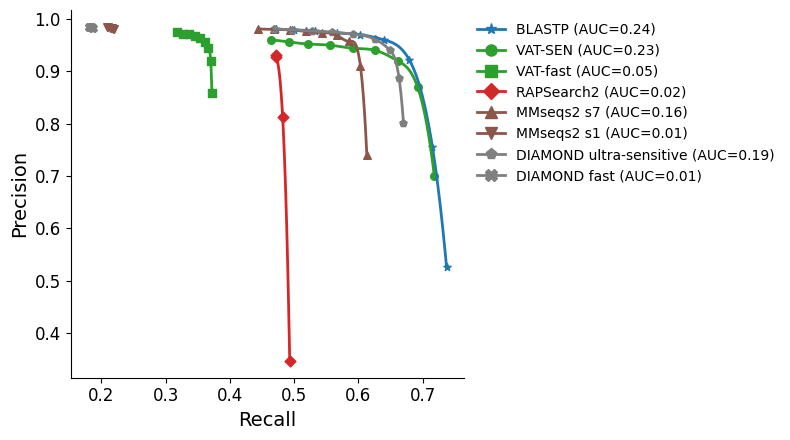

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.lines import Line2D

# Data for each method stored in a dictionary
data = {
    "BLASTP": {
        "Precision": np.array([0.527, 0.756, 0.922, 0.96, 0.97, 0.973, 0.977, 0.979, 0.98]),
        "Recall":    np.array([0.737, 0.715, 0.679, 0.64, 0.603, 0.566, 0.532, 0.5, 0.472]),
    },
    "VAT-SEN": {
        "Precision": np.array([0.7, 0.87, 0.92, 0.94, 0.944, 0.95, 0.952, 0.956, 0.96]),
        "Recall":    np.array([0.718, 0.692, 0.661, 0.626, 0.591, 0.555, 0.522, 0.492, 0.464]),
    },
    "VAT-fast": {
        "Precision": np.array([0.858, 0.92, 0.944, 0.955, 0.963, 0.968, 0.971, 0.972, 0.975]),
        "Recall":    np.array([0.372, 0.37, 0.366, 0.361, 0.354, 0.345, 0.336, 0.327, 0.318]),
    },
    "RAPSearch2": {
        "Precision": np.array([0.347, 0.813, 0.928, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931]),
        "Recall":    np.array([0.493, 0.482, 0.472, 0.471, 0.471, 0.471, 0.471, 0.471, 0.471]),
    },
    "MMseqs2 s7": {
        "Precision": np.array([0.741, 0.91, 0.957, 0.969, 0.974, 0.976, 0.979, 0.98, 0.981]),
        "Recall":    np.array([0.613, 0.603, 0.586, 0.566, 0.543, 0.519, 0.493, 0.468, 0.444]),
    },
    "MMseqs2 s1": {
        "Precision": np.array([0.976, 0.98, 0.981, 0.981, 0.982, 0.983, 0.983, 0.984, 0.984]),
        "Recall":    np.array([0.219, 0.219, 0.218, 0.218, 0.217, 0.215, 0.213, 0.211, 0.208]),
    },
    "DIAMOND ultra-sensitive": {
        "Precision": np.array([0.802, 0.888, 0.94, 0.961, 0.971, 0.975, 0.977, 0.979, 0.981]),
        "Recall":    np.array([0.67, 0.663, 0.649, 0.626, 0.592, 0.559, 0.527, 0.497, 0.469]),
    },
    "DIAMOND fast": {
        "Precision": np.array([0.98, 0.982, 0.983, 0.983, 0.984, 0.984, 0.984, 0.985, 0.985]),
        "Recall":    np.array([0.187, 0.187, 0.186, 0.186, 0.185, 0.184, 0.183, 0.181, 0.18]),
    }
}

# Define a color dictionary for each method
color_dict = {
    "BLASTP": "#1f77b4",              # blue
    "VAT-SEN": "#2ca02c",             # orange
    "VAT-fast": "#2ca02c",            # green
    "RAPSearch2": "#d62728",          # red
    "MMseqs2 s7": "#8c564b",          # purple
    "MMseqs2 s1": "#8c564b",          # brown
    "DIAMOND ultra-sensitive": "#7f7f7f",  # pink
    "DIAMOND fast": "#7f7f7f"         # gray
}

# Define a marker dictionary for each method
marker_dict = {
    "BLASTP": "*",              # star marker
    "VAT-SEN": "o",             # circle marker
    "VAT-fast": "s",            # square marker
    "RAPSearch2": "D",          # diamond marker
    "MMseqs2 s7": "^",          # triangle up
    "MMseqs2 s1": "v",          # triangle down
    "DIAMOND ultra-sensitive": "p",  # pentagon marker
    "DIAMOND fast": "X"         # X marker
}

plt.figure(figsize=(8, 4.5))

# This list will hold our custom legend handles.
legend_handles = []

# Loop over each method
for method, metrics in data.items():
    precision = metrics["Precision"]
    recall = metrics["Recall"]
    
    # Reverse arrays so that Recall is in increasing order.
    recall_sorted = recall[::-1]
    precision_sorted = precision[::-1]
    
    # Remove duplicate Recall values and keep corresponding Precision values.
    unique_recall, unique_indices = np.unique(recall_sorted, return_index=True)
    unique_precision = precision_sorted[unique_indices]
    
    # Compute AUC using the trapezoidal rule on the unique points.
    auc = np.trapz(unique_precision, unique_recall)
    
    # Spline interpolation if there are enough unique points.
    if len(unique_recall) >= 4:
        spline = make_interp_spline(unique_recall, unique_precision, k=3)
        recall_smooth = np.linspace(unique_recall.min(), unique_recall.max(), 300)
        precision_smooth = spline(recall_smooth)
    else:
        recall_smooth = unique_recall
        precision_smooth = unique_precision
    
    # Plot the smooth line for the precision-recall curve.
    plt.plot(recall_smooth, precision_smooth, color=color_dict[method], linestyle='-', lw=2)
    
    # Plot the data points with the custom marker.
    plt.scatter(unique_recall, unique_precision, s=30, color=color_dict[method], marker=marker_dict[method])
    
    # Create a custom legend handle that includes both the line and marker.
    handle = Line2D([0], [0],
                    color=color_dict[method],
                    marker=marker_dict[method],
                    markersize=8,
                    linestyle='-',
                    lw=2,
                    label=f"{method} (AUC={auc:.2f})")
    legend_handles.append(handle)

plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove the top and right borders.
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add the custom legend outside the plot area on the right.
plt.legend(handles=legend_handles, loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.tight_layout()

plt.show()


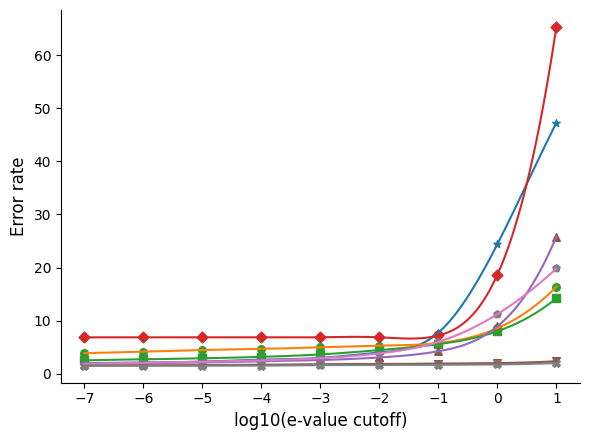

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 1. Define the e-value cutoffs and compute their log10 values.
evalues = np.array([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001])
log_evalues = np.log10(evalues)  # [1, 0, -1, -2, -3, -4, -5, -6, -7]

# 2. Sort the x-values so they are strictly increasing (needed for spline).
order = np.argsort(log_evalues)  # ascending order
log_evalues_sorted = log_evalues[order]

# 3. Prepare a fine-grained x-axis for the smooth curves.
x_smooth = np.linspace(log_evalues_sorted.min(), log_evalues_sorted.max(), 300)

# 4. Define the error_rate data for each method.
data = {
    "BLASTP": {
        "error_rate": np.array([47.29, 24.43, 7.77, 4.03, 3, 2.68, 2.31, 2.14, 1.99]),
    },
    "VAT-SEN": {
        "error_rate": np.array([16.4, 8.6, 5.8, 5.3, 5, 4.7, 4.5, 4.2, 3.9]),
    },
    "VAT-fast": {
        "error_rate": np.array([14.23, 8.03, 5.59, 4.48, 3.66, 3.21, 2.93, 2.75, 2.54]),
    },
    "RAPSearch2": {
        "error_rate": np.array([65.3, 18.68, 7.23, 6.89, 6.89, 6.88, 6.88, 6.88, 6.88]),
    },
    "MMseqs2 s7": {
        "error_rate": np.array([25.85, 8.95, 4.26, 3.09, 2.6, 2.36, 2.14, 2, 1.87]),
    },
    "MMseqs2 s1": {
        "error_rate": np.array([2.38, 2.02, 1.93, 1.86, 1.83, 1.73, 1.65, 1.61, 1.59]),
    },
    "DIAMOND ultra-sensitive": {
        "error_rate": np.array([19.84, 11.25, 6.03, 3.86, 2.95, 2.54, 2.29, 2.1, 1.91]),
    },
    "DIAMOND fast": {
        "error_rate": np.array([2.04, 1.78, 1.71, 1.67, 1.65, 1.56, 1.56, 1.54, 1.53]),
    }
}
# Define a color dictionary for each method
color_dict = {
    "BLASTP": "#1f77b4",              # blue
    "VAT-SEN": "#2ca02c",             # orange
    "VAT-fast": "#2ca02c",            # green
    "RAPSearch2": "#d62728",          # red
    "MMseqs2 s7": "#8c564b",          # purple
    "MMseqs2 s1": "#8c564b",          # brown
    "DIAMOND ultra-sensitive": "#7f7f7f",  # pink
    "DIAMOND fast": "#7f7f7f"         # gray
}

# Define a marker dictionary for each method
marker_dict = {
    "BLASTP": "*",              # star marker
    "VAT-SEN": "o",             # circle marker
    "VAT-fast": "s",            # square marker
    "RAPSearch2": "D",          # diamond marker
    "MMseqs2 s7": "^",          # triangle up
    "MMseqs2 s1": "v",          # triangle down
    "DIAMOND ultra-sensitive": "p",  # pentagon marker
    "DIAMOND fast": "X"         # X marker
}
# 5. Plot the smooth error rate curves.
plt.figure(figsize=(6, 4.5))

for method, metrics in data.items():
    err = metrics["error_rate"]
    # Reorder the error_rate array to match the sorted log_evalues
    err_sorted = err[order]
    
    # Use spline interpolation for a smooth curve
    spline = make_interp_spline(log_evalues_sorted, err_sorted, k=3)
    err_smooth = spline(x_smooth)
    #  plt.scatter(unique_recall, unique_precision, s=30, color=color_dict[method], marker=marker_dict[method])
    # Plot the smooth line + original points
    plt.plot(x_smooth, err_smooth, label=method)
    plt.scatter(log_evalues_sorted, err_sorted, s=30,color=color_dict[method], marker=marker_dict[method])

# 6. Configure axes, legend, and title.
plt.xlabel("log10(e-value cutoff)", fontsize=12)
plt.ylabel("Error rate", fontsize=12)
# plt.title("Smooth Error Rate vs. log10(e-value cutoff)", fontsize=14)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# plt.legend(loc="upper left", bbox_to_anchor=(1, 1),frameon=False)
# plt.grid(False, alpha=0.3)
plt.tight_layout()
plt.show()


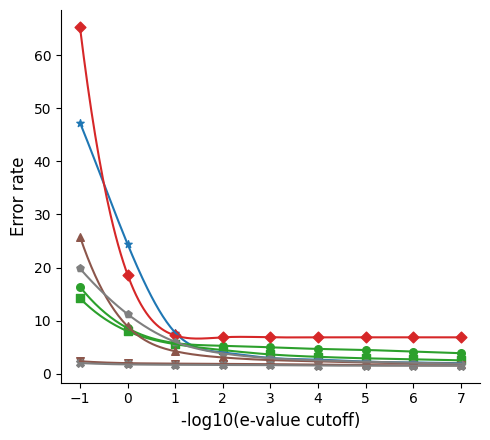

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 1. Define the e-value cutoffs and compute their -log10 values.
evalues = np.array([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001])
neg_log_evalues = -np.log10(evalues)  # results in: [-1, 0, 1, 2, 3, 4, 5, 6, 7]

# 2. Sort the x-values (though they are already in increasing order).
order = np.argsort(neg_log_evalues)
neg_log_evalues_sorted = neg_log_evalues[order]

# 3. Prepare a fine-grained x-axis for the smooth curves.
x_smooth = np.linspace(neg_log_evalues_sorted.min(), neg_log_evalues_sorted.max(), 300)

# 4. Define the error_rate data for each method.
data = {
    "BLASTP": {
        "error_rate": np.array([47.29, 24.43, 7.77, 4.03, 3, 2.68, 2.31, 2.14, 1.99]),
    },
    "VAT-SEN": {
        "error_rate": np.array([16.4, 8.6, 5.8, 5.3, 5, 4.7, 4.5, 4.2, 3.9]),
    },
    "VAT-fast": {
        "error_rate": np.array([14.23, 8.03, 5.59, 4.48, 3.66, 3.21, 2.93, 2.75, 2.54]),
    },
    "RAPSearch2": {
        "error_rate": np.array([65.3, 18.68, 7.23, 6.89, 6.89, 6.88, 6.88, 6.88, 6.88]),
    },
    "MMseqs2 s7": {
        "error_rate": np.array([25.85, 8.95, 4.26, 3.09, 2.6, 2.36, 2.14, 2, 1.87]),
    },
    "MMseqs2 s1": {
        "error_rate": np.array([2.38, 2.02, 1.93, 1.86, 1.83, 1.73, 1.65, 1.61, 1.59]),
    },
    "DIAMOND ultra-sensitive": {
        "error_rate": np.array([19.84, 11.25, 6.03, 3.86, 2.95, 2.54, 2.29, 2.1, 1.91]),
    },
    "DIAMOND fast": {
        "error_rate": np.array([2.04, 1.78, 1.71, 1.67, 1.65, 1.56, 1.56, 1.54, 1.53]),
    }
}

# Define a color dictionary for each method.
color_dict = {
    "BLASTP": "#1f77b4",              
    "VAT-SEN": "#2ca02c",             
    "VAT-fast": "#2ca02c",            
    "RAPSearch2": "#d62728",          
    "MMseqs2 s7": "#8c564b",          
    "MMseqs2 s1": "#8c564b",          
    "DIAMOND ultra-sensitive": "#7f7f7f",  
    "DIAMOND fast": "#7f7f7f"         
}

# Define a marker dictionary for each method.
marker_dict = {
    "BLASTP": "*",              
    "VAT-SEN": "o",             
    "VAT-fast": "s",            
    "RAPSearch2": "D",          
    "MMseqs2 s7": "^",          
    "MMseqs2 s1": "v",          
    "DIAMOND ultra-sensitive": "p",  
    "DIAMOND fast": "X"         
}

# 5. Plot the smooth error rate curves.
plt.figure(figsize=(5, 4.5))

for method, metrics in data.items():
    err = metrics["error_rate"]
    # Reorder error_rate to match the sorted -log10 values.
    err_sorted = err[order]
    
    # Use spline interpolation for a smooth curve.
    spline = make_interp_spline(neg_log_evalues_sorted, err_sorted, k=3)
    err_smooth = spline(x_smooth)
    
    # Plot the smooth curve and the original data points.
    plt.plot(x_smooth, err_smooth, label=method, color=color_dict[method])
    plt.scatter(neg_log_evalues_sorted, err_sorted, s=30, color=color_dict[method], marker=marker_dict[method])

# 6. Configure axes, legend, and labels.
plt.xlabel("-log10(e-value cutoff)", fontsize=12)
plt.ylabel("Error rate", fontsize=12)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.tight_layout()
plt.show()


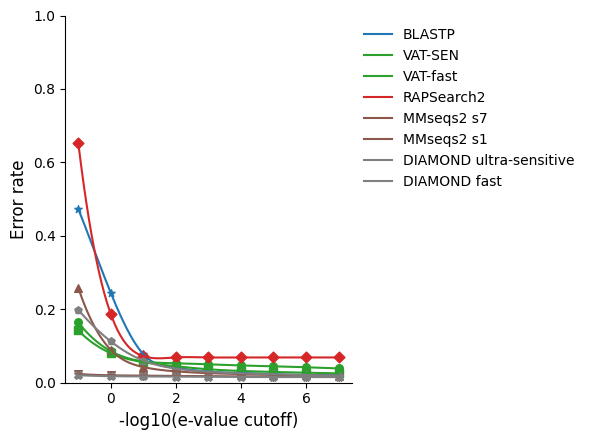

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 1. Define the e-value cutoffs and compute their -log10 values.
evalues = np.array([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001])
neg_log_evalues = -np.log10(evalues)  # gives: [-1, 0, 1, 2, 3, 4, 5, 6, 7]

# 2. Sort the x-values (if needed).
order = np.argsort(neg_log_evalues)
neg_log_evalues_sorted = neg_log_evalues[order]

# 3. Prepare a fine-grained x-axis for the smooth curves.
x_smooth = np.linspace(neg_log_evalues_sorted.min(), neg_log_evalues_sorted.max(), 300)

# 4. Define the error_rate data for each method (currently in percentages).
data = {
    "BLASTP": {
        "error_rate": np.array([47.29, 24.43, 7.77, 4.03, 3, 2.68, 2.31, 2.14, 1.99]),
    },
    "VAT-SEN": {
        "error_rate": np.array([16.4, 8.6, 5.8, 5.3, 5, 4.7, 4.5, 4.2, 3.9]),
    },
    "VAT-fast": {
        "error_rate": np.array([14.23, 8.03, 5.59, 4.48, 3.66, 3.21, 2.93, 2.75, 2.54]),
    },
    "RAPSearch2": {
        "error_rate": np.array([65.3, 18.68, 7.23, 6.89, 6.89, 6.88, 6.88, 6.88, 6.88]),
    },
    "MMseqs2 s7": {
        "error_rate": np.array([25.85, 8.95, 4.26, 3.09, 2.6, 2.36, 2.14, 2, 1.87]),
    },
    "MMseqs2 s1": {
        "error_rate": np.array([2.38, 2.02, 1.93, 1.86, 1.83, 1.73, 1.65, 1.61, 1.59]),
    },
    "DIAMOND ultra-sensitive": {
        "error_rate": np.array([19.84, 11.25, 6.03, 3.86, 2.95, 2.54, 2.29, 2.1, 1.91]),
    },
    "DIAMOND fast": {
        "error_rate": np.array([2.04, 1.78, 1.71, 1.67, 1.65, 1.56, 1.56, 1.54, 1.53]),
    }
}

# Define a color dictionary for each method.
color_dict = {
    "BLASTP": "#1f77b4",              
    "VAT-SEN": "#2ca02c",             
    "VAT-fast": "#2ca02c",            
    "RAPSearch2": "#d62728",          
    "MMseqs2 s7": "#8c564b",          
    "MMseqs2 s1": "#8c564b",          
    "DIAMOND ultra-sensitive": "#7f7f7f",  
    "DIAMOND fast": "#7f7f7f"         
}

# Define a marker dictionary for each method.
marker_dict = {
    "BLASTP": "*",              
    "VAT-SEN": "o",             
    "VAT-fast": "s",            
    "RAPSearch2": "D",          
    "MMseqs2 s7": "^",          
    "MMseqs2 s1": "v",          
    "DIAMOND ultra-sensitive": "p",  
    "DIAMOND fast": "X"         
}

# 5. Plot the smooth error rate curves.
plt.figure(figsize=(6, 4.5))

for method, metrics in data.items():
    # Convert percentage error rates to fractions (0-1).
    err = metrics["error_rate"] / 100.0
    # Reorder the error_rate array to match the sorted -log10 values.
    err_sorted = err[order]
    
    # Use spline interpolation for a smooth curve.
    spline = make_interp_spline(neg_log_evalues_sorted, err_sorted, k=3)
    err_smooth = spline(x_smooth)
    
    # Plot the smooth curve and the original data points.
    plt.plot(x_smooth, err_smooth, label=method, color=color_dict[method])
    plt.scatter(neg_log_evalues_sorted, err_sorted, s=30, color=color_dict[method], marker=marker_dict[method])

# 6. Configure axes, legend, and labels.
plt.xlabel("-log10(e-value cutoff)", fontsize=12)
plt.ylabel("Error rate", fontsize=12)
plt.ylim(0, 1)  # Set y-axis from 0 to 1.

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.tight_layout()
plt.show()


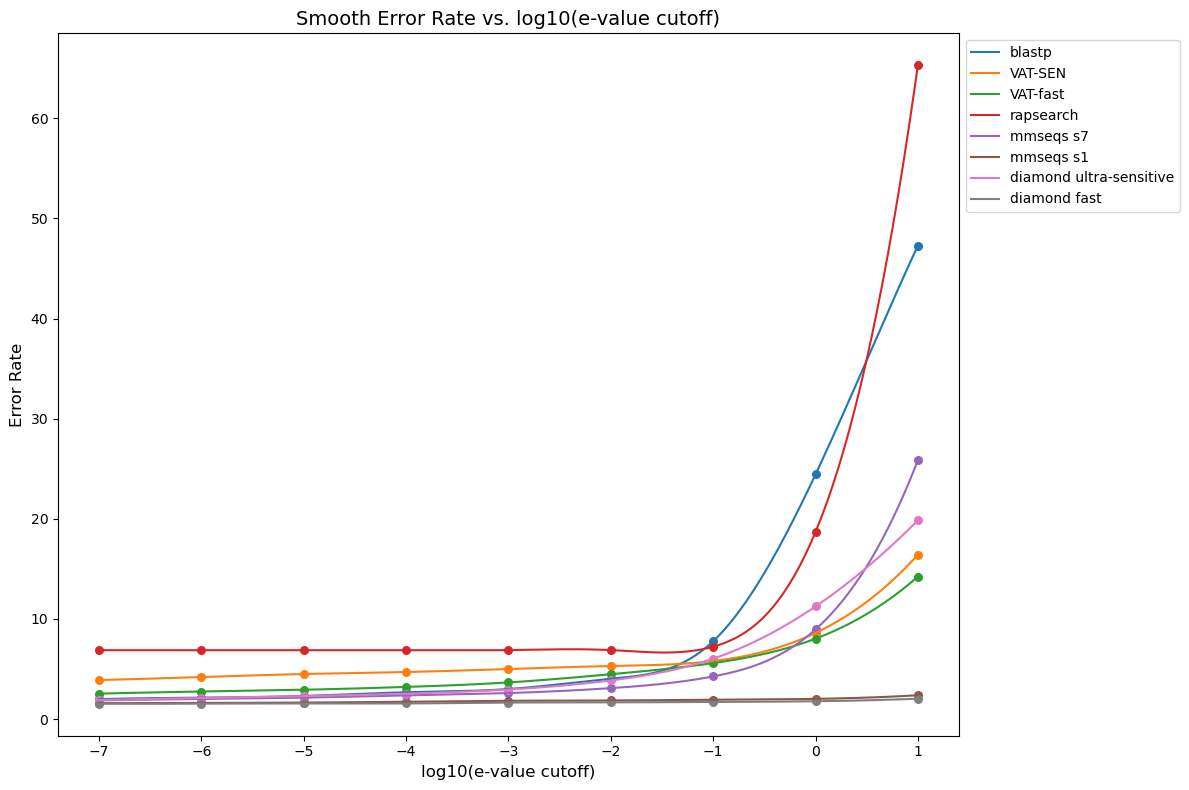

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 1. Define the e-value cutoffs and compute their log10 values.
evalues = np.array([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001])
log_evalues = np.log10(evalues)  # [1, 0, -1, -2, -3, -4, -5, -6, -7]

# 2. Sort the x-values so they are strictly increasing (needed for spline).
order = np.argsort(log_evalues)  # ascending order
log_evalues_sorted = log_evalues[order]

# 3. Prepare a fine-grained x-axis for the smooth curves.
x_smooth = np.linspace(log_evalues_sorted.min(), log_evalues_sorted.max(), 300)

# 4. Define the error_rate data for each method.
data = {
    "blastp": {
        "error_rate": np.array([47.29, 24.43, 7.77, 4.03, 3, 2.68, 2.31, 2.14, 1.99]),
    },
    "VAT-SEN": {
        "error_rate": np.array([16.4, 8.6, 5.8, 5.3, 5, 4.7, 4.5, 4.2, 3.9]),
    },
    "VAT-fast": {
        "error_rate": np.array([14.23, 8.03, 5.59, 4.48, 3.66, 3.21, 2.93, 2.75, 2.54]),
    },
    "rapsearch": {
        "error_rate": np.array([65.3, 18.68, 7.23, 6.89, 6.89, 6.88, 6.88, 6.88, 6.88]),
    },
    "mmseqs s7": {
        "error_rate": np.array([25.85, 8.95, 4.26, 3.09, 2.6, 2.36, 2.14, 2, 1.87]),
    },
    "mmseqs s1": {
        "error_rate": np.array([2.38, 2.02, 1.93, 1.86, 1.83, 1.73, 1.65, 1.61, 1.59]),
    },
    "diamond ultra-sensitive": {
        "error_rate": np.array([19.84, 11.25, 6.03, 3.86, 2.95, 2.54, 2.29, 2.1, 1.91]),
    },
    "diamond fast": {
        "error_rate": np.array([2.04, 1.78, 1.71, 1.67, 1.65, 1.56, 1.56, 1.54, 1.53]),
    }
}

# 5. Plot the smooth error rate curves.
plt.figure(figsize=(12, 8))

for method, metrics in data.items():
    err = metrics["error_rate"]
    # Reorder the error_rate array to match the sorted log_evalues
    err_sorted = err[order]
    
    # Use spline interpolation for a smooth curve
    spline = make_interp_spline(log_evalues_sorted, err_sorted, k=3)
    err_smooth = spline(x_smooth)
    
    # Plot the smooth line + original points
    plt.plot(x_smooth, err_smooth, label=method)
    plt.scatter(log_evalues_sorted, err_sorted, s=30)

# 6. Configure axes, legend, and title.
plt.xlabel("log10(e-value cutoff)", fontsize=12)
plt.ylabel("Error Rate", fontsize=12)
plt.title("Smooth Error Rate vs. log10(e-value cutoff)", fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.tight_layout()
plt.show()


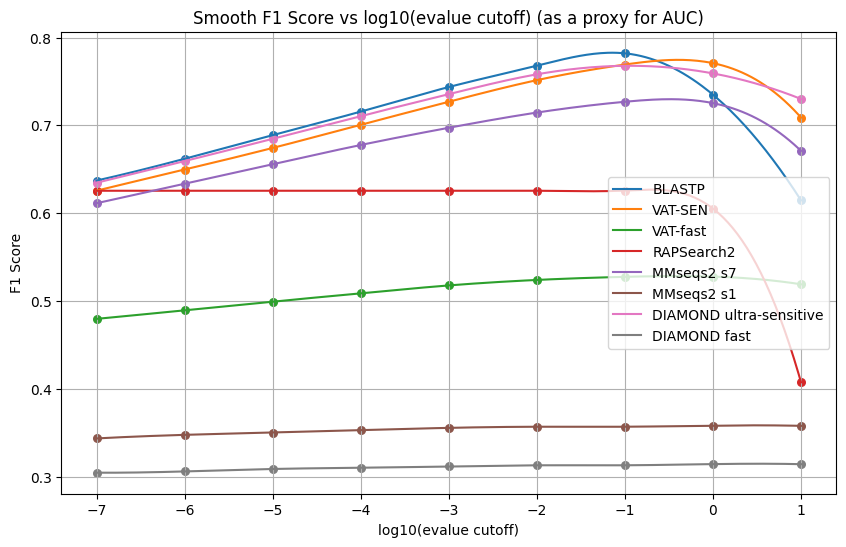

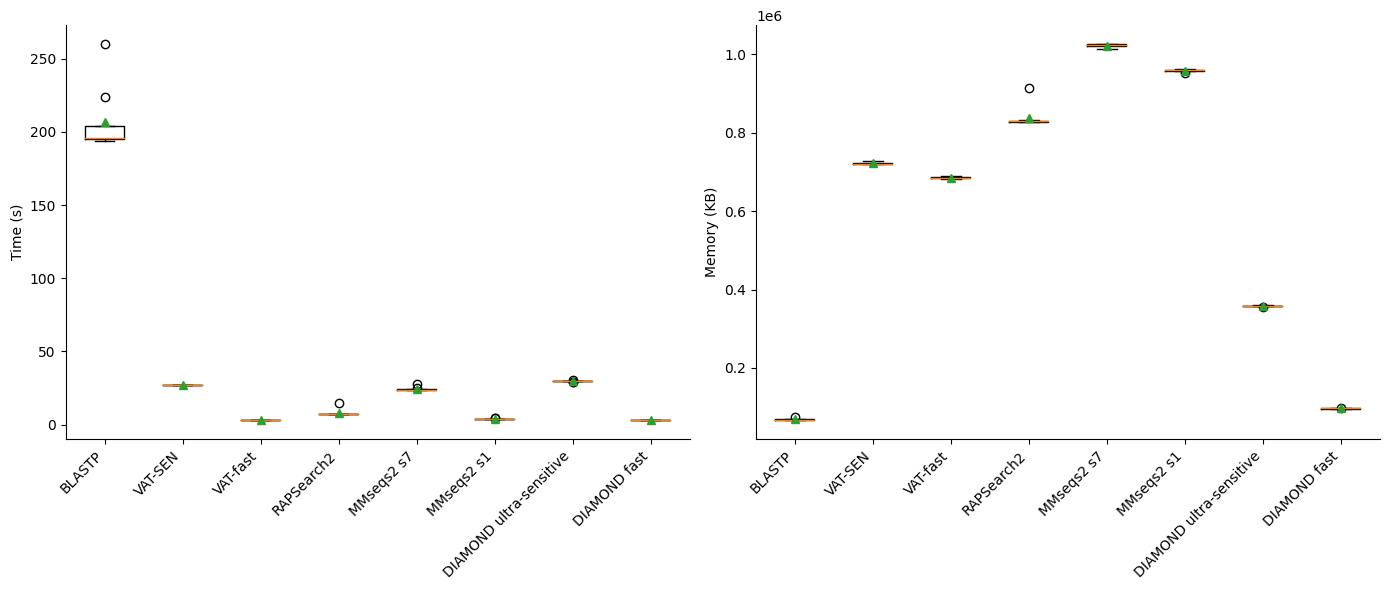

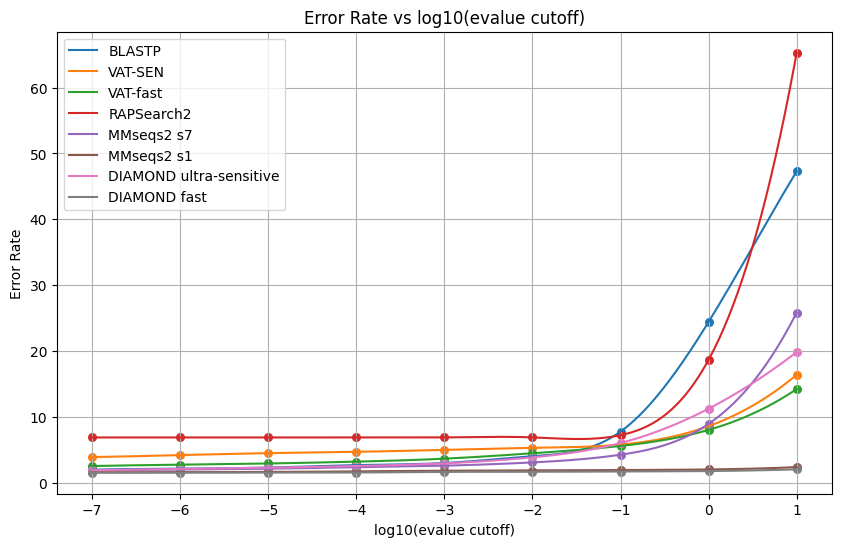

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Define evalue cutoffs and compute log10 values for a natural x-axis
evalues = np.array([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001])
log_evalues = np.log10(evalues)  # Results in: [ 1, 0, -1, -2, -3, -4, -5, -6, -7]

# Because log_evalues is strictly decreasing, sort the values (and corresponding indices)
order = np.argsort(log_evalues)  # gives indices for increasing order
log_evalues_sorted = log_evalues[order]

# Data for each method stored in a dictionary
data = {
    "BLASTP": {
        "Precision": np.array([0.527, 0.756, 0.922, 0.96, 0.97, 0.973, 0.977, 0.979, 0.98]),
        "Recall":    np.array([0.737, 0.715, 0.679, 0.64, 0.603, 0.566, 0.532, 0.5, 0.472]),
        "error_rate": np.array([47.29, 24.43, 7.77, 4.03, 3, 2.68, 2.31, 2.14, 1.99]),
        "Time": np.array([260, 224, 204, 199, 196, 195, 195, 194, 194]),
        "Memory": np.array([75840, 66952, 68988, 67500, 67760, 67472, 66172, 66600, 68776])
    },
    "VAT-SEN": {
        "Precision": np.array([0.7, 0.87, 0.92, 0.94, 0.944, 0.95, 0.952, 0.956, 0.96]),
        "Recall":    np.array([0.718, 0.692, 0.661, 0.626, 0.591, 0.555, 0.522, 0.492, 0.464]),
        "error_rate": np.array([16.4, 8.6, 5.8, 5.3, 5, 4.7, 4.5, 4.2, 3.9]),
        "Time": np.array([27]*9),
        "Memory": np.array([720592, 719424, 720356, 721904, 721320, 726788, 723608, 720332, 723408])
    },
    "VAT-fast": {
        "Precision": np.array([0.858, 0.92, 0.944, 0.955, 0.963, 0.968, 0.971, 0.972, 0.975]),
        "Recall":    np.array([0.372, 0.37, 0.366, 0.361, 0.354, 0.345, 0.336, 0.327, 0.318]),
        "error_rate": np.array([14.23, 8.03, 5.59, 4.48, 3.66, 3.21, 2.93, 2.75, 2.54]),
        "Time": np.array([3]*9),
        "Memory": np.array([689108, 688888, 687828, 686827, 684424, 684232, 683932, 681360, 681724])
    },
    "RAPSearch2": {
        "Precision": np.array([0.347, 0.813, 0.928, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931]),
        "Recall":    np.array([0.493, 0.482, 0.472, 0.471, 0.471, 0.471, 0.471, 0.471, 0.471]),
        "error_rate": np.array([65.3, 18.68, 7.23, 6.89, 6.89, 6.88, 6.88, 6.88, 6.88]),
        "Time": np.array([15, 7, 7, 7, 7, 7, 7, 7, 7]),
        "Memory": np.array([914772, 828844, 832376, 826376, 829224, 827052, 826600, 826896, 830360])
    },
    "MMseqs2 s7": {
        "Precision": np.array([0.741, 0.91, 0.957, 0.969, 0.974, 0.976, 0.979, 0.98, 0.981]),
        "Recall":    np.array([0.613, 0.603, 0.586, 0.566, 0.543, 0.519, 0.493, 0.468, 0.444]),
        "error_rate": np.array([25.85, 8.95, 4.26, 3.09, 2.6, 2.36, 2.14, 2, 1.87]),
        "Time": np.array([28, 24.8, 24.3, 24, 24, 24, 24, 24, 24]),
        "Memory": np.array([1022488, 1015076, 1026672, 1021084, 1023212, 1013892, 1026392, 1023800, 1026704])
    },
    "MMseqs2 s1": {
        "Precision": np.array([0.976, 0.98, 0.981, 0.981, 0.982, 0.983, 0.983, 0.984, 0.984]),
        "Recall":    np.array([0.219, 0.219, 0.218, 0.218, 0.217, 0.215, 0.213, 0.211, 0.208]),
        "error_rate": np.array([2.38, 2.02, 1.93, 1.86, 1.83, 1.73, 1.65, 1.61, 1.59]),
        "Time": np.array([4.29, 4, 4, 4.3, 4, 4, 4, 4, 4]),
        "Memory": np.array([960728, 960136, 960212, 957640, 959264, 951812, 962040, 956520, 960244])
    },
    "DIAMOND ultra-sensitive": {
        "Precision": np.array([0.802, 0.888, 0.94, 0.961, 0.971, 0.975, 0.977, 0.979, 0.981]),
        "Recall":    np.array([0.67, 0.663, 0.649, 0.626, 0.592, 0.559, 0.527, 0.497, 0.469]),
        "error_rate": np.array([19.84, 11.25, 6.03, 3.86, 2.95, 2.54, 2.29, 2.1, 1.91]),
        "Time": np.array([30.2, 30, 30, 30, 30, 29, 29, 30, 30]),
        "Memory": np.array([359696, 356752, 358900, 359044, 358928, 355424, 358516, 357948, 359212])
    },
    "DIAMOND fast": {
        "Precision": np.array([0.98, 0.982, 0.983, 0.983, 0.984, 0.984, 0.984, 0.985, 0.985]),
        "Recall":    np.array([0.187, 0.187, 0.186, 0.186, 0.185, 0.184, 0.183, 0.181, 0.18]),
        "error_rate": np.array([2.04, 1.78, 1.71, 1.67, 1.65, 1.56, 1.56, 1.54, 1.53]),
        "Time": np.array([3]*9),
        "Memory": np.array([96236, 95680, 95792, 96692, 96404, 96032, 97632, 98584, 96796])
    }
}

# Helper function to compute the F1 score
def f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

# ---------------------
# Plot 1: Smooth F1 Score (as a proxy for AUC) vs log10(evalue cutoff)
# ---------------------
plt.figure(figsize=(10, 6))
# Create a smooth x-axis for interpolation using the sorted log_evalues
x_smooth = np.linspace(log_evalues_sorted.min(), log_evalues_sorted.max(), 300)

for method, metrics in data.items():
    precision = metrics["Precision"]
    recall = metrics["Recall"]
    f1 = f1_score(precision, recall)
    # Reorder the F1 scores according to the sorted log_evalues
    f1_sorted = f1[order]
    # Spline interpolation for a smooth curve
    spline = make_interp_spline(log_evalues_sorted, f1_sorted, k=3)
    f1_smooth = spline(x_smooth)
    plt.plot(x_smooth, f1_smooth, label=method)
    plt.scatter(log_evalues_sorted, f1_sorted, s=30)  # Plot original data points

plt.xlabel('log10(evalue cutoff)')
plt.ylabel('F1 Score')
plt.title('Smooth F1 Score vs log10(evalue cutoff) (as a proxy for AUC)')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------
# Plot 2: Box plots for Time and Memory across evalue cutoffs
# ---------------------
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Prepare lists of values for each method
time_data = [metrics["Time"] for metrics in data.values()]
memory_data = [metrics["Memory"] for metrics in data.values()]
method_names = list(data.keys())

axs[0].boxplot(time_data, labels=method_names, showmeans=True)
# axs[0].set_title('Time (s)')
axs[0].set_ylabel('Time (s)')
axs[0].set_xticklabels(method_names, rotation=45, ha='right')
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)


axs[1].boxplot(memory_data, labels=method_names, showmeans=True)
# axs[1].set_title('Memory Usage')
axs[1].set_ylabel('Memory (KB)')
axs[1].set_xticklabels(method_names, rotation=45, ha='right')
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)
plt.tight_layout()
plt.show()

# ---------------------
# Plot 3: Error Rate vs log10(evalue cutoff)
# ---------------------
plt.figure(figsize=(10, 6))
for method, metrics in data.items():
    error_rate = metrics["error_rate"]
    # Reorder error rates according to sorted x values
    error_sorted = error_rate[order]
    spline = make_interp_spline(log_evalues_sorted, error_sorted, k=3)
    error_smooth = spline(x_smooth)
    plt.plot(x_smooth, error_smooth, label=method)
    plt.scatter(log_evalues_sorted, error_sorted, s=30)
plt.xlabel('log10(evalue cutoff)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs log10(evalue cutoff)')
plt.legend()
plt.grid(True)
plt.show()
